###   🚜predicting the sales price of bulldozers using machine learning

## 1. problem statement
 To predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

## 2. Data
https://www.kaggle.com/c/bluebook-for-bulldozers/data
The data for this competition is split into three parts:

1. Train.csv is the training set, which contains data through the end of 2011.
2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

https://www.kaggle.com/c/bluebook-for-bulldozers/overview



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# importing training and validation set
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv" ,
              low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

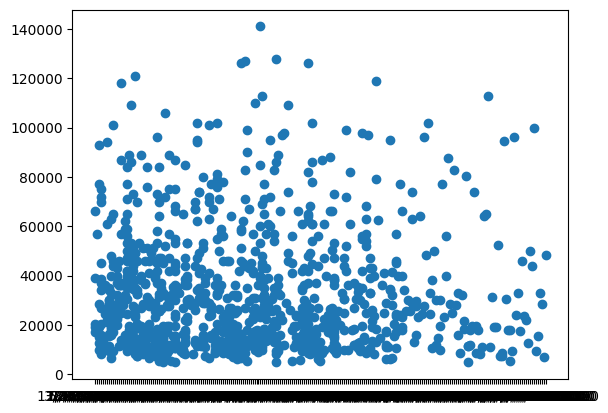

In [5]:
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

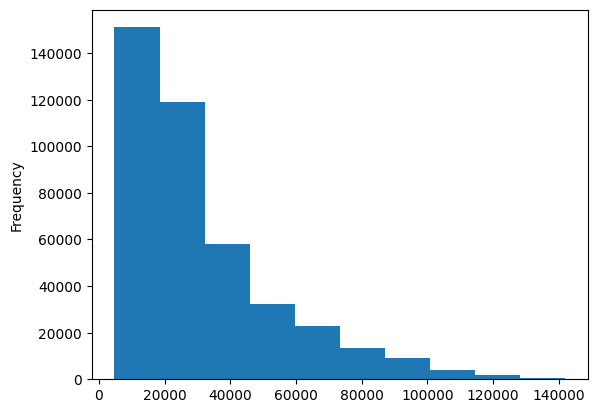

In [6]:
df.SalePrice.plot.hist()

### Parsing dates 
when working with date and time series in pandas we should use `parse_dates` parameter to identify the time and date columns

In [7]:
#Import data again but this time parse dates
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv" ,
              low_memory=False,
              parse_dates=['saledate'])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df['saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

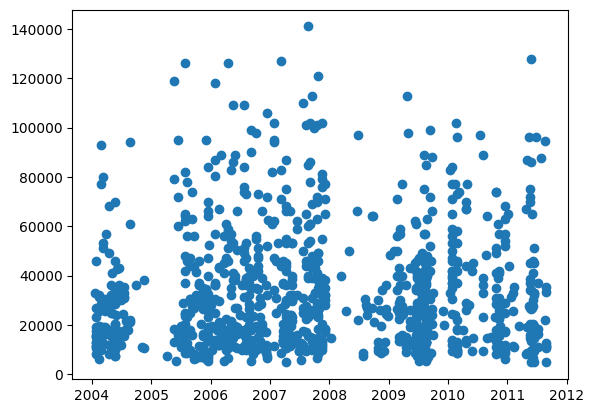

In [10]:
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [11]:
df.head().T #transpose view

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### sort dataframe by date
its good to sort data acco to date when working with time series 

In [13]:
#Sorting dataframe acco to date
df.sort_values(by=['saledate'], inplace=True, ascending =True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe
just to experiment on the copy so our original dataframe is safe

In [14]:
#Make a copy 
df_tmp=df.copy()

In [15]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Add a date time parameter for saledate column

In [16]:
df_tmp['saleYear']=df_tmp.saledate.dt.year
df_tmp['saleMonth']=df_tmp.saledate.dt.month
df_tmp['saleDay']=df_tmp.saledate.dt.day
df_tmp['saleOfWeek']=df_tmp.saledate.dt.dayofweek
df_tmp['saleOfYear']=df_tmp.saledate.dt.dayofyear

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# since we have enriched our data so we wont need saledate column
df_tmp.drop("saledate",axis=1,
            inplace=True)

In [19]:
#check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### 5. Modelling 

let's do some model driven EDA

In [20]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

### Convert string into categories 
we can turn all of our data into numbers by converting them into pandas categories

In [23]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [24]:
df_tmp["UsageBand"].head(30)

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
54653     NaN
81383     NaN
204924    NaN
135376    NaN
113390    NaN
113394    NaN
116419    NaN
32138     NaN
127610    NaN
76171     NaN
127000    NaN
128130    NaN
127626    NaN
55455     NaN
55454     NaN
144032    NaN
54438     NaN
144952    NaN
205752    NaN
28927     NaN
86971     NaN
67034     NaN
87602     NaN
53101     NaN
205784    NaN
Name: UsageBand, dtype: object

In [25]:
df_tmp['Steering_Controls']

205615             NaN
274835    Conventional
141296             NaN
212552    Conventional
62755              NaN
              ...     
410879             NaN
412476             NaN
411927             NaN
407124             NaN
409203    Conventional
Name: Steering_Controls, Length: 412698, dtype: object

In [26]:
df_tmp.items

<bound method DataFrame.items of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   
...         ...        ...        ...      ...         ...           ...   
410879  6302984    16000.0    1915521     5266         149          99.0   
412476  6324811     6000.0    1919104    19330         149          99.0   
411927  6313029    16000.0    1918416    17244         149          99.0   
407124  6266251    55000.0     509560     3357         149          99.0   
409203  6283635    34000.0    1869284     4701         149          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand f

In [28]:
#Find the colums which comtains strings or objects 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
#This will turn all the string into pandas categories
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) :
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [31]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [32]:
df_tmp.state.cat.codes 

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [33]:
df_tmp.fiModelDesc.cat.categories

Index(['100C', '104', '1066', '1066E', '1080', '1080B', '1088', '1088CK',
       '1088LT', '1088TTL',
       ...
       'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80', 'ZX800',
       'ZX800LC', 'ZX80LCK', 'ZX850H'],
      dtype='object', length=5059)

In [34]:
df_tmp.fiModelDesc.cat.codes

205615    4592
274835    1819
141296    2347
212552    1818
62755     2118
          ... 
410879    2100
412476     239
411927     626
407124      82
409203     988
Length: 412698, dtype: int16

In [35]:
#now all our data have been converted into numbers 


### Save preprocessed data

In [36]:
#Export current tmp dataframe
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
             index=False)

In [37]:
#Importing the data
df_tmp=pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                  low_memory=False)

In [39]:
df_tmp.head(50)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleOfWeek,saleOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
5,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
6,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,IT12,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
7,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,544,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
8,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,D5HII,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
9,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,12F,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


### Fill missing values

In [40]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill numerical missing values first

In [41]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleOfWeek
saleOfYear


In [42]:
#check which numeric colums have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if (df_tmp[label].isna().sum()!=0):
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [43]:
df_tmp['auctioneerID'].isna().sum()

20136

In [46]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
#Filling the missing values with median of their column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if (df_tmp[label].isna().sum()!=0):
            #Add a binary column which tells us if the data was missing 
            df_tmp[label+ "_is_missing"]=pd.isnull(content)
            #Filling median values 
            df_tmp[label]=content.fillna(content.median())

In [48]:
#check if numeric columns still have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if (df_tmp[label].isna().sum()!=0):
            print(label)

In [49]:
#check to see how many examples where missing 
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [50]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [51]:
#check for columns which aren't numeric 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [52]:
#check for columns which contain null values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if (df_tmp[label].isna().sum()!=0):
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [57]:
#fill missing values 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label]=pd.Categorical(content).codes
        if (df_tmp[label].isna().sum()!=0):
            #Add a binary column which tells us if the data was missing 
            df_tmp[label+ "_is_missing"]=pd.isnull(content)
            #Turing categories into numbers and adding +1 
            df_tmp[label]=pd.Categorical(content).codes+1

In [58]:
pd.Categorical(df_tmp['state']).codes +1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [59]:
pd.Categorical(df['UsageBand']).codes #by default pandas assign null values as -1 in category 

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [60]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 97 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   SalesID                              412698 non-null  int64  
 1   SalePrice                            412698 non-null  float64
 2   MachineID                            412698 non-null  int64  
 3   ModelID                              412698 non-null  int64  
 4   datasource                           412698 non-null  int64  
 5   auctioneerID                         412698 non-null  float64
 6   YearMade                             412698 non-null  int64  
 7   MachineHoursCurrentMeter             412698 non-null  float64
 8   UsageBand                            412698 non-null  int8   
 9   fiModelDesc                          412698 non-null  int16  
 10  fiBaseModel                          412698 non-null  int16  
 11  fiSecondaryDe

In [61]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

now our data has no missing values so we should be able to fit this into our machine learning model

### splitting the data into train and validation set

In [62]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [63]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [64]:
#splitting data into trining and validation
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [65]:
#splitting data into x and y 

x_train,y_train=df_train.drop("SalePrice", axis=1), df_train.SalePrice
x_valid,y_valid=df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 96), (401125,), (11573, 96), (11573,))

In [66]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4592,1743,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2347,712,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1818,557,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2118,682,...,True,True,True,True,True,False,False,False,True,True


### Building an Evaluation Function



In [74]:
#create evaluation function (Root mean squared log error RMSLE ) which is required by the competetion
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''calculates Root mean squared log error beetween predictions and true labels 
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
    
# create diff evaluation func
def showscores(model):
    train_preds=model.predict(x_train)
    valid_preds=model.predict(x_valid)
    scores= {'Training MAE':mean_absolute_error(y_train,train_preds),
             'Valid MAE':mean_absolute_error(y_valid,valid_preds),
             'Training RMSLE':rmsle(y_train,train_preds),
             'Valid RSMLE':rmsle(y_valid,valid_preds),
             'Training R^2':r2_score(y_train,train_preds),
             'Valid R^2':r2_score(y_valid,valid_preds)}
    return scores

### Testing our model on a subset (to tune hyperparameter) 

In [71]:
from sklearn.ensemble import RandomForestRegressor

## this takes far too long.........so that;s why we are reducing the sample size to 100000

model=RandomForestRegressor(n_jobs=-1,
                       random_state=42,
                           max_samples=10000)


In [72]:
model.fit(x_train,y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [75]:
showscores(model)

{'Training MAE': 5561.513057924589,
 'Valid MAE': 7155.632784930442,
 'Training RMSLE': 0.2578005599357549,
 'Valid RSMLE': 0.29223097494391737,
 'Training R^2': 0.860722898583499,
 'Valid R^2': 0.832588403039663}

### Hyperparameter tuning with RandomisedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# It basically runs our model on diff hyperparameter settings and finds out the best one

#Different RandomForestRegressor hyperparameters
rf_grid={"n_estimators": np.arange(10,1000,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}

#Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  9...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [83]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [85]:
# Evaluate the randomisedsearch model
showscores(rs_model)

{'Training MAE': 6925.378058758205,
 'Valid MAE': 8039.339568046107,
 'Training RMSLE': 0.3087527093650384,
 'Valid RSMLE': 0.32392401033149093,
 'Training R^2': 0.7956580256145284,
 'Valid R^2': 0.7937759229727391}

### Train a model with the best hyperparameter
**Note:** These were found after 100 iterations of `RandomisedSearchCV`


In [86]:
# so the most ideal HyperParameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_split=14,
                                 min_samples_leaf=1,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None)
#fit the model
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [87]:
showscores(ideal_model)

{'Training MAE': 2950.6266473158475,
 'Valid MAE': 5942.3888444875765,
 'Training RMSLE': 0.14450179853182965,
 'Valid RSMLE': 0.24577718463057305,
 'Training R^2': 0.9589218628249963,
 'Valid R^2': 0.8818692299597065}

here our valid RMSLE(root mean squared log error) should be as least as possible

# Make predictions on test data


In [99]:
# Import the Test dataset
df_test=pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                   low_memory=False,
                   parse_dates=['saledate'])
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


here we can see that our test data is not in the same format as our training data 

# Preprocessing the data (getting test data in the same format as training data)

In [100]:
def preprocess_data(df):
    '''this function transforms test data and returns it in the form of training data
    '''
    df['saleYear']=df.saledate.dt.year
    df['saleMonth']=df.saledate.dt.month
    df['saleDay']=df.saledate.dt.day
    df['saleOfWeek']=df.saledate.dt.dayofweek
    df['saleOfYear']=df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,
            inplace=True)
    
    #Fill the numeric rows with median
    #Filling the missing values with median of their column
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if (df[label].isna().sum()!=0):
                #Add a binary column which tells us if the data was missing 
                df[label+ "_is_missing"]=pd.isnull(content)
                #Filling median values 
                df[label]=content.fillna(content.median())
                
        #filling Categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=pd.Categorical(content).codes
            if (df[label].isna().sum()!=0):
                #Add a binary column which tells us if the data was missing 
                df[label+ "_is_missing"]=pd.isnull(content)
                #Turing categories into numbers and adding +1 
                df[label]=pd.Categorical(content).codes+1
            
    return df    
    

In [101]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4592,1743,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2347,712,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1818,557,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2118,682,...,True,True,True,True,True,False,False,False,True,True


In [102]:
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleOfWeek,saleOfYear,MachineHoursCurrentMeter_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,1,498,179,...,-1,-1,-1,-1,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,0,830,291,...,-1,-1,2,1,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,2,1176,403,...,-1,-1,-1,-1,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,0,286,112,...,-1,-1,-1,-1,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,1,565,195,...,3,4,-1,-1,2012,5,10,3,131,False


In [103]:
#To find which columns are missing 
set(x_train.columns)-set(df_test.columns)

{'Backhoe_Mounting_is_missing',
 'Blade_Extension_is_missing',
 'Blade_Type_is_missing',
 'Blade_Width_is_missing',
 'Coupler_System_is_missing',
 'Coupler_is_missing',
 'Differential_Type_is_missing',
 'Drive_System_is_missing',
 'Enclosure_Type_is_missing',
 'Enclosure_is_missing',
 'Engine_Horsepower_is_missing',
 'Forks_is_missing',
 'Grouser_Tracks_is_missing',
 'Grouser_Type_is_missing',
 'Hydraulics_Flow_is_missing',
 'Hydraulics_is_missing',
 'Pad_Type_is_missing',
 'Pattern_Changer_is_missing',
 'ProductSize_is_missing',
 'Pushblock_is_missing',
 'Ride_Control_is_missing',
 'Ripper_is_missing',
 'Scarifier_is_missing',
 'Steering_Controls_is_missing',
 'Stick_Length_is_missing',
 'Stick_is_missing',
 'Thumb_is_missing',
 'Tip_Control_is_missing',
 'Tire_Size_is_missing',
 'Track_Type_is_missing',
 'Transmission_is_missing',
 'Travel_Controls_is_missing',
 'Turbocharged_is_missing',
 'Undercarriage_Pad_Width_is_missing',
 'UsageBand_is_missing',
 'auctioneerID_is_missing',
 'fi

In [119]:
#we have this many columns missing because these columns do not have any null values 

# we have to manully fill these columns in out test data set 
df_test[['Backhoe_Mounting_is_missing',
 'Blade_Extension_is_missing',
 'Blade_Type_is_missing',
 'Blade_Width_is_missing',
 'Coupler_System_is_missing',
 'Coupler_is_missing',
 'Differential_Type_is_missing',
 'Drive_System_is_missing',
 'Enclosure_Type_is_missing',
 'Enclosure_is_missing',
 'Engine_Horsepower_is_missing',
 'Forks_is_missing',
 'Grouser_Tracks_is_missing',
 'Grouser_Type_is_missing',
 'Hydraulics_Flow_is_missing',
 'Hydraulics_is_missing',
 'Pad_Type_is_missing',
 'Pattern_Changer_is_missing',
 'ProductSize_is_missing',
 'Pushblock_is_missing',
 'Ride_Control_is_missing',
 'Ripper_is_missing',
 'Scarifier_is_missing',
 'Steering_Controls_is_missing',
 'Stick_Length_is_missing',
 'Stick_is_missing',
 'Thumb_is_missing',
 'Tip_Control_is_missing',
 'Tire_Size_is_missing',
 'Track_Type_is_missing',
 'Transmission_is_missing',
 'Travel_Controls_is_missing',
 'Turbocharged_is_missing',
 'Undercarriage_Pad_Width_is_missing',
 'UsageBand_is_missing',
 'auctioneerID_is_missing',
 'fiModelDescriptor_is_missing',
 'fiModelSeries_is_missing',
 'fiSecondaryDesc_is_missing']]=False
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
UsageBand_is_missing,False,False,False,False,False
auctioneerID_is_missing,False,False,False,False,False
fiModelDescriptor_is_missing,False,False,False,False,False
fiModelSeries_is_missing,False,False,False,False,False


In [120]:
new_order=['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleOfWeek', 'saleOfYear', 'auctioneerID_is_missing',
       'MachineHoursCurrentMeter_is_missing', 'UsageBand_is_missing',
       'fiSecondaryDesc_is_missing', 'fiModelSeries_is_missing',
       'fiModelDescriptor_is_missing', 'ProductSize_is_missing',
       'Drive_System_is_missing', 'Enclosure_is_missing', 'Forks_is_missing',
       'Pad_Type_is_missing', 'Ride_Control_is_missing', 'Stick_is_missing',
       'Transmission_is_missing', 'Turbocharged_is_missing',
       'Blade_Extension_is_missing', 'Blade_Width_is_missing',
       'Enclosure_Type_is_missing', 'Engine_Horsepower_is_missing',
       'Hydraulics_is_missing', 'Pushblock_is_missing', 'Ripper_is_missing',
       'Scarifier_is_missing', 'Tip_Control_is_missing',
       'Tire_Size_is_missing', 'Coupler_is_missing',
       'Coupler_System_is_missing', 'Grouser_Tracks_is_missing',
       'Hydraulics_Flow_is_missing', 'Track_Type_is_missing',
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing']

df_test=df_test[new_order]

In [121]:
x_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleOfWeek', 'saleOfYear', 'auctioneerID_is_missing',
    

In [122]:
#Finally our test data is ready for prediction
test_preds=ideal_model.predict(df_test)

In [123]:
len(test_preds)

12457

In [124]:
test_preds

array([24289.12996819, 24650.31837839, 48018.6401644 , ...,
       30961.05745928, 69159.23875778, 73921.23370714])

In [125]:
# Format predicitons into the same format kaggle is after
df_preds=pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalesPrice']=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,24289.129968
1,1227844,24650.318378
2,1227847,48018.640164
3,1227848,62527.300868
4,1227863,32200.936305
...,...,...
12452,6643171,34908.215188
12453,6643173,60458.567829
12454,6643184,30961.057459
12455,6643186,69159.238758


In [127]:
# Export the prdictions 
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv",index=False)

### Feature Importance 
Feature importance seeks to figure out which data features were the most imp in predicting the target here salesprice 

In [130]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.36244046e-02, 1.64728441e-02, 3.99988645e-02, 1.64821765e-03,
       3.35362023e-03, 2.05884577e-01, 3.16186643e-03, 1.02511888e-03,
       4.92705581e-02, 5.71870198e-02, 7.14124866e-02, 4.83425231e-03,
       1.64294350e-02, 1.65417842e-01, 3.71742501e-02, 5.93123415e-03,
       3.09019279e-03, 1.50984098e-03, 4.91529858e-03, 5.02107923e-02,
       6.06720012e-04, 5.30839967e-05, 7.38272199e-04, 1.93546731e-04,
       9.10876508e-04, 2.10592806e-05, 1.95476585e-04, 6.24826456e-03,
       6.77476830e-04, 5.41171371e-04, 4.29412113e-03, 4.24587396e-03,
       3.49374813e-03, 1.15514127e-03, 6.50520703e-04, 9.28755025e-03,
       1.17126601e-03, 9.18604855e-03, 2.84927317e-03, 1.35519388e-03,
       1.24262275e-03, 9.16403748e-04, 2.37665854e-03, 5.76161746e-04,
       5.49150455e-04, 3.29845800e-04, 2.69631730e-04, 1.54401393e-03,
       8.10059472e-04, 2.43763797e-04, 4.11549540e-04, 7.37364108e-02,
       3.84194352e-03, 5.70069115e-03, 2.87815527e-03, 9.82901248e-03,
      

In [144]:
# Helper function for ploting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({'features':columns,
                     'feature_importances':importances,})
       .sort_values('feature_importances',ascending=False)
       .reset_index(drop=True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel('features')
    ax.set_xlabel('feature_importances')
    ax.invert_yaxis()

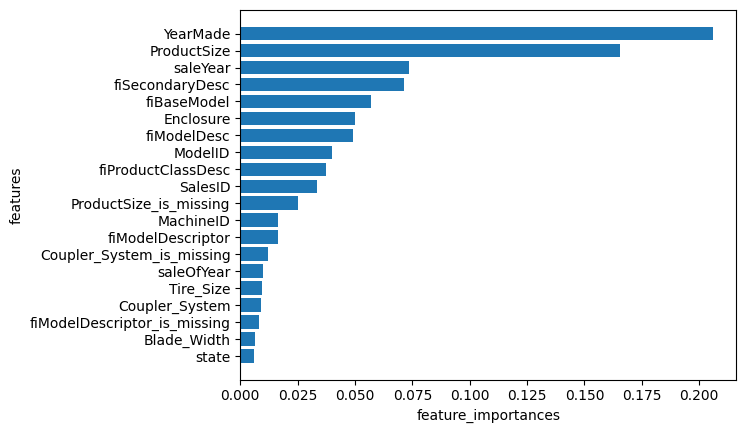

In [145]:
plot_features(x_train.columns, ideal_model.feature_importances_)